# Support Vector Machines

This notebook is part of  course materials for CS 345: Machine Learning Foundations and Practice at Colorado State University. Created by Ross Beveridge in Fall 2021

Last Update 12/02/2021

*The text is released under the [CC BY-SA license](https://creativecommons.org/licenses/by-sa/4.0/), and code is released under the [MIT license](https://opensource.org/licenses/MIT).*

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

This material is new to CS345 for Fall 2021 and for the moment much of the background motivation will be presented on the whiteboard in lecture. What this notebook does provide are two excellent worked examples - one on toy data and another on real data. 

## Simple 2 class 2D data example

Here is a two class Support Vector Machine model demonstrated on simple 2D data.

In [8]:
from matplotlib.colors import ListedColormap

def plot_boundary(classifier, X, y, axes = None) :
    """
    code based on:
    https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html
    """
    classifier.fit(X, y)
    # color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
    # create a two dimensional grid of points
    h = .02  # grid size
    x_min, x_max = X[:, 0].min() - 0.2, X[:, 0].max() + 0.2
    y_min, y_max = X[:, 1].min() - 0.2, X[:, 1].max() + 0.2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # plot the predictions on the grid
    Z = Z.reshape(xx.shape)
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light, shading='auto')

    # plot the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, alpha=0.5)
    
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

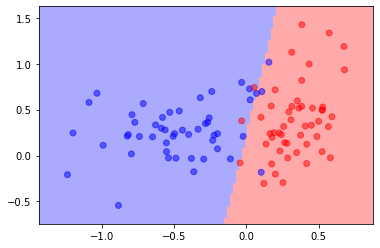

In [9]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=100, n_features=2, n_informative=2, 
                          n_redundant=0, n_repeated=0, n_classes=2, 
                          n_clusters_per_class=1, class_sep=0.35, random_state=1)

from sklearn import svm
clf = svm.LinearSVC()

plot_boundary(clf, X, y)

## SVM for Leukemia Dataset

And here is an SVM applied to the Leukemia Dataset

In [10]:
import requests
# if you don't have requests installed you can use urlopen which is part
# of the python standard library
# from urllib.request import urlopen

link = "https://web.stanford.edu/~hastie/CASI_files/DATA/leukemia_big.csv"
# retrieve the contents of the file
contents = requests.get(link)

In [11]:
lines = contents.text.split()
# the data is in csv format and the labels appear in the first 
# row of the dataset:
print (lines[0])
class_convert = {'ALL':1, 'AML':0}
y = np.array([class_convert[token] for token in lines[0].split(',')])
X = np.array([ [float(token) for token in line.split(',')] 
              for line in lines[1:] ])
X = X.transpose()
X.shape,y.shape

ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,ALL,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML,AML


((72, 7128), (72,))

In [12]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold

classifier = svm.LinearSVC()

cv = StratifiedKFold(n_splits=5, random_state=0, shuffle=True)
accuracy = cross_val_score(classifier, X, y, cv=cv, scoring='accuracy')
np.mean(accuracy)

0.9723809523809525

Note how close in accuracy this linear SVM comes to matching the performance of the Random Forest Classifier presented at the end of the previous lecture.